# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')
df['Sex'] = df['Sex'].map({'male':0, 'female': 1})

train_Y = df['Survived']
df = df.drop(['PassengerId'] , axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


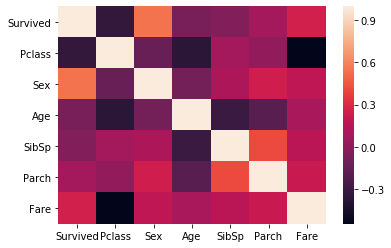

In [2]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [3]:
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [4]:
# 記得刪除 Survived
df = df.drop(['Survived'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

6 Numeric Features : ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

In [5]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7822774202448624

## 篩選相關係數1 (Threshold = 0.05)

In [6]:
# 篩選相關係數1
thres = 0.05
high_list = list(corr.index[corr['Survived'].abs() > thres].drop('Survived'))
print(high_list)

['Pclass', 'Sex', 'Age', 'Parch', 'Fare']


In [7]:
# 特徵1 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7800175332392129

## 篩選相關係數1 (Threshold = 0.1)

In [8]:
# 篩選相關係數2
thres = 0.1
high_list = list(corr.index[(corr['Survived'] > thres) | (corr['Survived'] < -1*thres)].drop('Survived'))
print(high_list)

['Pclass', 'Sex', 'Fare']


In [9]:
# 特徵2 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7844803880576795

## 篩選相關係數3 (Threshold = 0.3)

In [10]:
# 篩選相關係數3
thres = 0.3
high_list = list(corr.index[(corr['Survived'] > thres) | (corr['Survived'] < -1*thres)].drop('Survived'))
print(high_list)

# 特徵3 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

['Pclass', 'Sex']


0.7867150249291879

# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [11]:
from sklearn.linear_model import Lasso
"""
Your Code Here, select parameter alpha 
"""
L1_Reg = Lasso(alpha=0.001)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

array([-0.33250038,  0.51495298, -0.18417697, -0.25206339, -0.        ,
        0.04828966])

In [12]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
L1_mask = L1_Reg.coef_ != 0
L1_list = df.columns[L1_mask]
L1_list

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [14]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7788939377335947

In [15]:
for alpha in [1e-5, 1e-4, 1e-3, 0.01, 0.1, 0.5, 1]:
    train_X = MMEncoder.fit_transform(df)
    L1_mask = Lasso(alpha=alpha).fit(train_X, train_Y).coef_ != 0
    L1_list = df.columns[L1_mask]
    
    if len(L1_list) > 0:
        train_X = MMEncoder.fit_transform(df[L1_list])
        score = cross_val_score(estimator, train_X, train_Y, cv=5).mean()
        print(f"Alpha = {alpha: > 7}, Features = {len(L1_list)}, Score = {score}")
    else:
        print(f"Alpha = {alpha: > 7}, Features = {len(L1_list)}, Score = PASS")

Alpha =   1e-05, Features = 6, Score = 0.7822774202448624
Alpha =  0.0001, Features = 6, Score = 0.7822774202448624
Alpha =   0.001, Features = 5, Score = 0.7788939377335947
Alpha =    0.01, Features = 2, Score = 0.7867150249291879
Alpha =     0.1, Features = 1, Score = 0.7867150249291879
Alpha =     0.5, Features = 0, Score = PASS
Alpha =       1, Features = 0, Score = PASS
